## Observations and Insights

1:Among the drug regimens, Ramicane appears to be the most effective drug in reducing final tumor volume.
2:Averge tumor volume of the mouse is directly proportional to its weight.
3:Data presented for the top four effective drug appears to be normally distributed with and has no outliers.

## Dependencies and starter code

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from pprint import pprint

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
Drug_list=combined_df['Drug Regimen'].unique()
Drug_list.sort()
combined_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [121]:
data={'Statistics':('Mean','Median','Variance','Standard Variance', 'Standard Error of Mean'),
      'Values':(combined_df["Tumor Volume (mm3)"].mean(),combined_df["Tumor Volume (mm3)"].median(),
      combined_df["Tumor Volume (mm3)"].var(),combined_df["Tumor Volume (mm3)"].std(),
      combined_df["Tumor Volume (mm3)"].sem())}

pd.DataFrame(data)

#DO IT WITH plt.table


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

,Statistics,Values
0,Mean,50.448381
1,Median,48.951474
2,Variance,79.116074
3,Standard Variance,8.894722
4,Standard Error of Mean,0.204436


## Bar plots

[Text(0,0.5,'Data Points'),
 Text(0.5,0,'Drug Regimen'),
 Text(0.5,1,'Number of data points for each treatment regimen')]

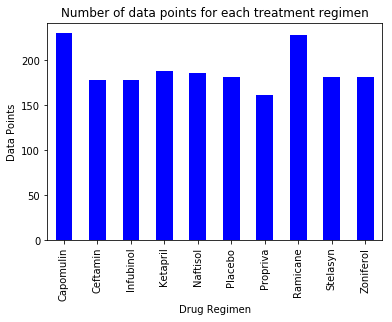

In [135]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
group=combined_df.groupby(['Drug Regimen']).count()

bar=group['Timepoint'].plot(kind='bar',legend =False,color = 'b')
bar.set(xlabel="Drug Regimen", ylabel="Data Points",title="Number of data points for each treatment regimen")
bar.

(0, 235)

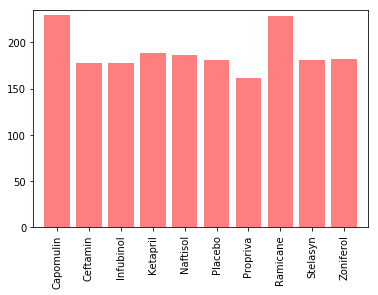

In [136]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
 
Y_axis=[x for x in group['Mouse ID']]

x_axis=np.arange(len(Y_axis))
plt.bar(x_axis, Y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_list,rotation='vertical')
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(Y_axis) + 5)



## Pie plots

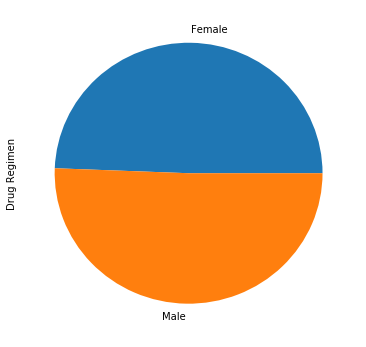

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_m=combined_df.groupby(['Sex']).count()
group_m

group_m.plot(kind='pie', y=['Drug Regimen'],legend=False,figsize=(6, 6))


(-1.2895392455161503,
 1.1103068123149018,
 -1.1126933839287776,
 1.2918692678582502)

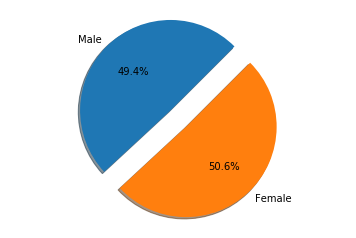

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(group_m['Drug Regimen'],explode=[0.25,0],labels=['Male','Female'],autopct='%1.1f%%',shadow=True,startangle=45)
plt.axis('equal')

## Quartiles, outliers and boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
combined_df.head(15)
group_quart=combined_df.groupby(['Drug Regimen'])
group_quart['Tumor Volume (mm3)'].describe().sort_values(by='mean')



,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817


In [127]:
combined_df_reduced=combined_df.loc[:,['Mouse ID','Drug Regimen','Weight (g)','Timepoint','Tumor Volume (mm3)']]
finaltumorV_df=combined_df_reduced.loc[(combined_df_reduced["Timepoint"]==45)]
finaltumorV_Ramicane=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Ramicane")]
finaltumorV_Ramicane

quartiles = finaltumorV_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ramicane_outlier=finaltumorV_Ramicane.loc[(finaltumorV_Ramicane["Tumor Volume (mm3)"]<lower_bound)]
Ramicane_outlier=finaltumorV_Ramicane.loc[(finaltumorV_Ramicane["Tumor Volume (mm3)"]>upper_bound)]
print(f'Ramicane treatment has {len(Ramicane_outlier)} potential outliers')
if len(Ramicane_outlier)!=0:
    Ramicane_outlier


Ramicane treatment has 0 potential outliers


In [128]:
finaltumorV_Capomulin=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Capomulin")]

quartiles = finaltumorV_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_c = lowerq - (1.5*iqr)
upper_bound_c = upperq + (1.5*iqr)

Campomulin_outlier=finaltumorV_Capomulin.loc[(finaltumorV_Capomulin["Tumor Volume (mm3)"]<lower_bound_c)]
Campoulin_outlier=finaltumorV_Capomulin.loc[(finaltumorV_Capomulin["Tumor Volume (mm3)"]>upper_bound_c)]

print(f'Campomulin treatment has {len(Campomulin_outlier)} potential outliers')
if len(Campomulin_outlier)!=0:
    Campomulin_outlier


Campomulin treatment has 0 potential outliers


In [129]:
finaltumorV_Infubinol=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Infubinol")]


quartiles = finaltumorV_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_I = lowerq - (1.5*iqr)
upper_bound_I = upperq + (1.5*iqr)


Infubinol_outlier=finaltumorV_Infubinol.loc[(finaltumorV_Infubinol["Tumor Volume (mm3)"]<lower_bound_I)]
Infubinol_outlier=finaltumorV_Infubinol.loc[(finaltumorV_Infubinol["Tumor Volume (mm3)"]>upper_bound_I)]

print(f'Propriva treatment has {len(Infubinol_outlier)} potential outliers')
if len(Infubinol_outlier)!=0:
    Infubinol_outlier

Propriva treatment has 0 potential outliers


In [130]:
finaltumorV_Ceftamin=finaltumorV_df.loc[(finaltumorV_df["Drug Regimen"]=="Ceftamin")]


quartiles = finaltumorV_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound_cf = lowerq - (1.5*iqr)
upper_bound_cf = upperq + (1.5*iqr)

Ceftamin_outlier=finaltumorV_Ceftamin.loc[(finaltumorV_Ceftamin["Tumor Volume (mm3)"]<lower_bound_cf)]
Ceftamin_outlier=finaltumorV_Ceftamin.loc[(finaltumorV_Ceftamin["Tumor Volume (mm3)"]>upper_bound_cf)]

print(f'Ceftamin treatment has {len(Ceftamin_outlier)} potential outliers')
if len(Ceftamin_outlier)!=0:
    Ceftamin_outlier

Ceftamin treatment has 0 potential outliers


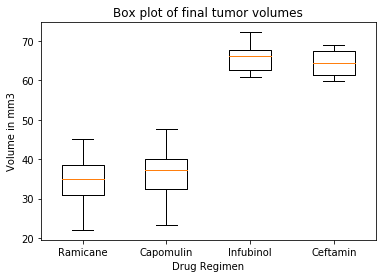

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ramicane_tv=[]
Capomulin_tv=[]
Infubinol_tv=[]
Ceftamin_tv=[]


for x in finaltumorV_Ramicane["Tumor Volume (mm3)"]:
    Ramicane_tv.append(x)
for x in finaltumorV_Capomulin["Tumor Volume (mm3)"]:
    Capomulin_tv.append(x)
for x in finaltumorV_Infubinol["Tumor Volume (mm3)"]:
    Infubinol_tv.append(x)
for x in finaltumorV_Ceftamin["Tumor Volume (mm3)"]:
    Ceftamin_tv.append(x)

final_data=[Ramicane_tv,Capomulin_tv,Infubinol_tv,Ceftamin_tv]

fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of final tumor volumes')
ax1.set_ylabel('Volume in mm3')
ax1.boxplot(final_data, widths = 0.5)
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(['Ramicane','Capomulin','Infubinol','Ceftamin'])

plt.show()

## Line and scatter plots

(20, 50.0)

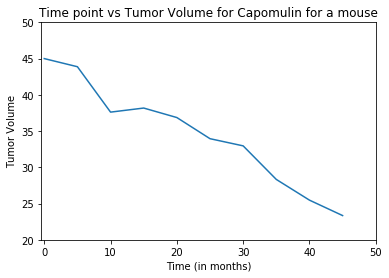

In [148]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_time=[]
Capomulin_vol=[]
Capomulin_w=[]

for data in combined_df.iterrows():
       if(data[1]['Mouse ID']=='s185'):
        Capomulin_time.append(data[1]["Timepoint"])
        Capomulin_vol.append(data[1]["Tumor Volume (mm3)"])
        Capomulin_w.append(data[1]["Weight (g)"])

fig1, ax1 = plt.subplots()
plt.plot(Capomulin_time,Capomulin_vol)
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Time (in months)")
ax1.set_title("Time point vs Tumor Volume for Capomulin for a mouse")

plt.xlim(-0.50, 50)
plt.ylim(20, max(Capomulin_vol) + 5)

Text(0,0.5,'Average Tumor Volume')

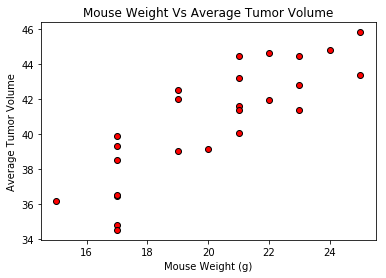

In [149]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capmulin_data=combined_df_reduced.loc[(combined_df_reduced["Drug Regimen"]=="Capomulin")]    

grouped_cap=capmulin_data.groupby('Mouse ID')
mean_volume=grouped_cap['Tumor Volume (mm3)'].mean()
weight_cap=grouped_cap['Weight (g)'].mean()

plt.scatter(weight_cap, mean_volume, marker="o", facecolors="red", edgecolors="black")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume")


The r-squared is: 0.8419363424694718


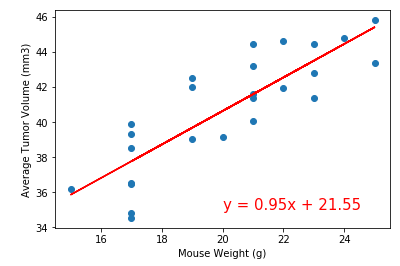

In [150]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_cap, mean_volume)
regress_values=weight_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_cap, mean_volume)
plt.plot(weight_cap,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")